## Importing data and imputing missing values

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"AmesHousing.csv")

df.columns = df.columns.str.replace(" ", "")

df.isnull().sum()

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.isnull().sum()

Order            0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage      0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 82, dtype: int64

## Scaling Numerical Features

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
num_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
minmax = MinMaxScaler()
df_zscore = df.copy()
df_minmax = df.copy()
df_zscore[num_cols] = scaler.fit_transform(df[num_cols])
df_minmax[num_cols] = minmax.fit_transform(df[num_cols])
df_zscore[num_cols].head(), df_minmax[num_cols].head()

(      Order       PID  MSSubClass  LotFrontage   LotArea  OverallQual  \
 0 -1.731460 -0.997164   -0.877005     3.375742  2.744381    -0.067254   
 1 -1.730277 -0.996904   -0.877005     0.514952  0.187097    -0.776079   
 2 -1.729095 -0.996899   -0.877005     0.561850  0.522814    -0.067254   
 3 -1.727913 -0.996888   -0.877005     1.124628  0.128458     0.641571   
 4 -1.726731 -0.992903    0.061285     0.233563  0.467348    -0.776079   
 
    OverallCond  YearBuilt  YearRemod/Add  MasVnrArea  ...  WoodDeckSF  \
 0    -0.506718  -0.375537      -1.163488    0.061046  ...    0.920121   
 1     0.393091  -0.342468      -1.115542   -0.566039  ...    0.366061   
 2     0.393091  -0.441674      -1.259380    0.038650  ...    2.368594   
 3    -0.506718  -0.110988      -0.779919   -0.566039  ...   -0.742060   
 4    -0.506718   0.848000       0.658466   -0.566039  ...    0.935952   
 
    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal  \
 0     0.214409      -0.35883

## Handling Noise

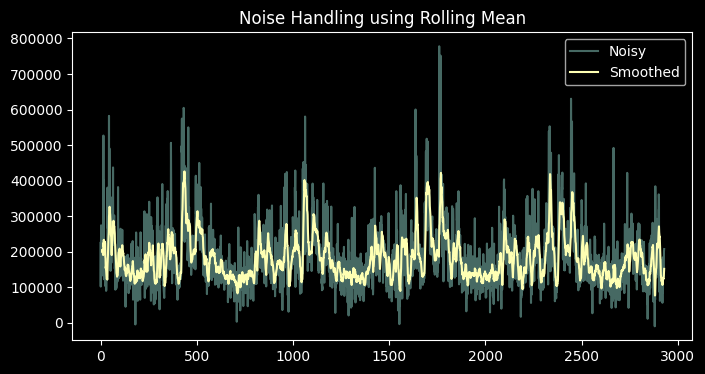

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
target_col = [c for c in df.columns if "Sale" in c and "Price" in c][0]
df[target_col + "_Noisy"] = df[target_col] + np.random.normal(0, 20000, size=len(df))
df[target_col + "_Smoothed"] = df[target_col + "_Noisy"].rolling(window=10).mean()
plt.figure(figsize=(8,4))
plt.plot(df[target_col + "_Noisy"], label="Noisy", alpha=0.5)
plt.plot(df[target_col + "_Smoothed"], label="Smoothed")
plt.legend()
plt.title("Noise Handling using Rolling Mean")
plt.show()

## Handling Outliers


In [4]:
from scipy.stats import zscore

area_col = [c for c in df.columns if "Liv" in c and "Area" in c][0]

df[area_col + "_Z"] = zscore(df[area_col])

outliers = df[abs(df[area_col + "_Z"]) > 3]
df_clean = df[abs(df[area_col + "_Z"]) <= 3]

print("Outliers detected:", len(outliers))
print("Remaining records:", len(df_clean))

Outliers detected: 25
Remaining records: 2905


## Feature Selection

In [5]:
import matplotlib.pyplot as plt

target = [c for c in df.columns if "Sale" in c and "Price" in c][0]

num_features = df.select_dtypes(include=np.number).columns.tolist()
num_features.remove(target)

corr = df[[target] + num_features].corr()[target].sort_values(ascending=False)

corr.drop(target).head(5).plot(kind="bar")
plt.title("Feature Correlation with " + target)
plt.show()

corr.head(6)

SalePrice             1.000000
SalePrice_Noisy       0.970859
OverallQual           0.799262
GrLivArea_Z           0.706780
GrLivArea             0.706780
SalePrice_Smoothed    0.685302
Name: SalePrice, dtype: float64